### EN2550: Assignment 03 on Object Counting on a Conveyor Belt

### Connected Component Analysis

   In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

            

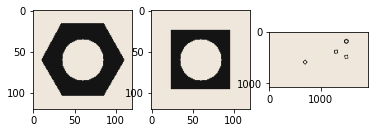

In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

1.Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

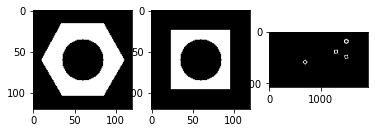

In [43]:
hexnut_template_ = cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template_ = cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_f100_ = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

th_t1, img_t1 = cv.threshold(hexnut_template_,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_t2, img_t2 = cv.threshold(squarenut_template_,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, img_b = cv.threshold(conveyor_f100_,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(img_t1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(img_t2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(img_b, cv.COLOR_RGB2BGR))
plt.show()

1.Carry out morphological closing to remove small holes inside the foreground. Use a 3 × 3
 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

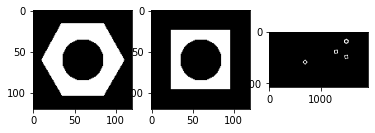

In [44]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))

closing_t1 = cv.morphologyEx(img_t1, cv.MORPH_CLOSE, kernel) 
closing_t2 = cv.morphologyEx(img_t2, cv.MORPH_CLOSE, kernel)
closing_b = cv.morphologyEx(img_b, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(closing_t1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(closing_t2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(closing_b, cv.COLOR_RGB2BGR))
plt.show()

1.Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions
How many connected components are detected in each image?
What are the statistics? Interpret these statistics.
What are the centroids?
For the hexnut template, you should get the object area in pixel as approximately 4728.

Hexnut Image
Number of labels:  2


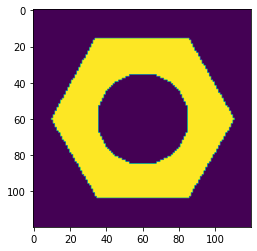

Stats: 
 [[   0    0  120  120 9672]
 [  10   16  101   88 4728]] 

Centroids: 
 [[59.33684864 59.63513234]
 [59.83375635 59.22356176]] 

Squarenut Image
Number of labels:  2


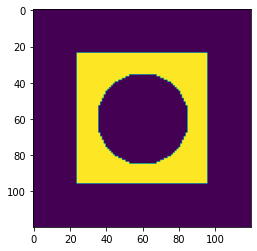

Stats: 
 [[    0     0   120   120 11173]
 [   24    24    72    72  3227]] 

Centroids: 
 [[59.5875772  59.5875772 ]
 [59.19677719 59.19677719]] 

Belt Image
Number of labels:  5


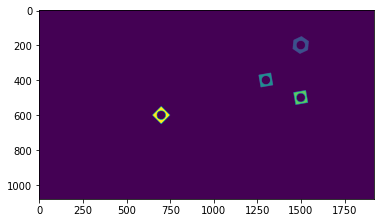

Stats: 
 [[      0       0    1920    1080 2059646]
 [   1454     150      92     100    4636]
 [   1259     359      82      82    3087]
 [   1459     459      82      82    3087]
 [    650     550     101     101    3144]] 

Centroids: 
 [[ 957.36323524  540.44416273]
 [1499.24201898  199.28515962]
 [1299.18302559  399.18302559]
 [1499.18302559  499.18302559]
 [ 700.          600.        ]] 



In [45]:
numlabels_t1, labels_t1, stats_t1, centroids_t1 = cv.connectedComponentsWithStats(closing_t1)
numlabels_t2, labels_t2, stats_t2, centroids_t2 = cv.connectedComponentsWithStats(closing_t2)
numlabels_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_b)

def cca_stats(img_name, numlabel, labels, stats, centroids):
    print(img_name)
    print("Number of labels: ", numlabel)
    plt.imshow(labels.astype('uint8')); plt.show()
    print("Stats: \n", stats,'\n') 
    print("Centroids: \n", centroids,'\n')

cca_stats("Hexnut Image", numlabels_t1, labels_t1, stats_t1, centroids_t1)
cca_stats("Squarenut Image", numlabels_t2, labels_t2, stats_t2, centroids_t2)
cca_stats("Belt Image", numlabels_b, labels_b, stats_b, centroids_b)

1.Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.
Display these contours. You should see something like the following:

extreme_outer_contours

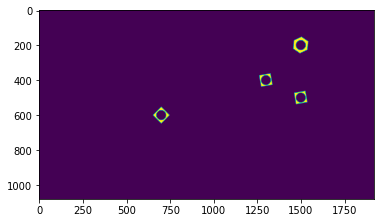

In [46]:
contours, hierarchy = cv.findContours(closing_b, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(closing_b, contours, -1, (0,255,0), 3)

plt.imshow(closing_b)
plt.show()

### Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

Open the sequence and play it using the code below.

In [21]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


1.Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.

1.Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.

In [3]:
# Yor code here.


# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here


out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()